In [39]:
# Set up.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

np.random.seed(42)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


As annotated in the README, determining course and speed of ships using bearings only simply isn't possible. This is already pretty well documented, but even trying to apply machine learning algorithms results in way too many ambiguous solutions.

I will have to make some of the images myself. I'm going to make a list of colors that I'll need.

I found a diagram of light orientations that I'm going to use.

In [40]:
targets = np.array(['Vessel underway (stern)',
                    'Power-driven vessel underway (>50m in length) (starboard)',
                    'Power-driven vessel underway (>50m in length) (port)',
                    'Power-driven vessel underway (>50m in length) (bow)',
                    'Power-driven vessel underway (<50m in length) (starboard)',
                    'Power-driven vessel underway (<50m in length) (port)',
                    'Power-driven vessel underway (<50m in length) (bow)'], dtype=np.dtype('unicode_'))

## Experimentation

Below is code that I used to figure out how to represent an image using rgb colors in numpy arrays.

In [41]:
colors_dict = {'white': (255, 255, 255), 'black': (0, 0, 0), 'red': (255, 0, 0), 'green': (0, 255, 0), 'yellow': (255, 255, 0)}

In [42]:
black = [[(0, 0, 0) for _ in range(255)] for _ in range(255)]

In [43]:
black_array = np.array(black, dtype=np.uint8)

In [44]:
black_array[100:110, 100:110] = (255, 255, 255)

In [45]:
black_array.shape

(255, 255, 3)

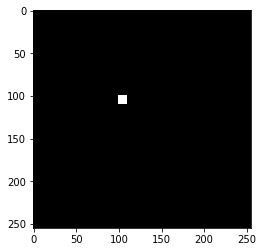

In [46]:
plt.imshow(black_array)
plt.show();

In [47]:
test_black = np.zeros((255, 255, 3))

In [48]:
raveled = np.ravel(test_black)

In [49]:
raveled.reshape(255, 255, 3);
reshaped = raveled.reshape(255, 255, 3);

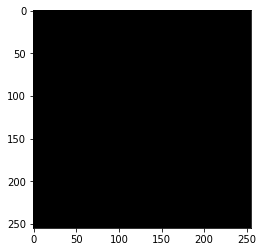

In [50]:
plt.imshow(test_black)
plt.show();

## Image Production

After messing around with generating images using rgb values nested in numpy arrays, I made several functions that generate the light orientations for the target values above. Stern lights are the same no matter the ship size, and for ships with one masthead light (less than 50m in length), the orientations are similar enough to warrant not generating their own separate images. The choice of the image size(255px x 255px) was arbitrary. Many of the choices in the range of random number generating was also arbitrary. I may have introduced ssome bias into the data this way. In order to see the image, be sure to reshape the given nested array to (255, 255, 3).

There is an opportunity to DRY the code by adjusting the 'broad' orientation functions so that they take an argument for which orientation you want.

In [51]:
def stern_light():
    """
    Makes a numpy array of a lot of different arrays meant to behave as an image of a stern light. 
    The color of stern lights is white, so this is fairly straight forward with a bunch of zeros.
    """
    min_pixel_bound = 50
    max_pixel_bound = 200
    total_gens = np.random.randint(500, 701)
    all_stern_images = np.empty([total_gens, 195075], dtype=np.uint8)
    for i in range(total_gens):
        light_width = np.random.randint(10, 51)
        start_x = np.random.randint(min_pixel_bound, max_pixel_bound)
        start_y = np.random.randint(min_pixel_bound, max_pixel_bound)
        new_array = np.zeros((255, 255, 3))
        aggregate_horiz = start_x + light_width
        aggregate_vert = start_y + light_width
        new_array[start_x:aggregate_horiz, start_y:aggregate_vert] = (255, 255, 255)
        new_array = new_array.flatten()
        all_stern_images[i] = new_array

    return all_stern_images


In [52]:
stern_images = stern_light()

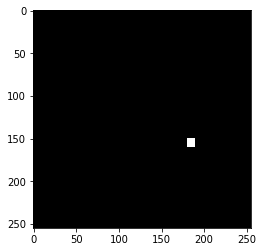

In [53]:
plt.imshow(stern_images[33].reshape(255, 255, 3))
plt.show();

In [54]:
def broad_greater_than_50_meters_starboard():
    """
    Return a numpy array of randomly generated images of a 
    power driven vessel that has two masthead lights and one running light
    visible for a starboard orientation.
    """
    white = (255, 255, 255)
    black = (0, 0, 0)
    green = (0, 255, 0)
    total_gens = np.random.randint(500, 701)
    all_broad_images = np.empty([total_gens, 195075], dtype=np.uint8)
    for i in range(total_gens):
        new_view = np.zeros((255, 255, 3))
        taller_masthead_light = np.random.randint(50, 126)
        shorter_masthead_light = np.random.randint(130, 186)
        left_endpoint = np.random.randint(20, 126)
        right_endpoint = np.random.randint(125, 211)
        running_light_height_diff = np.random.randint(10, 31)
        light_width = np.random.randint(10, 16)
        tall_masthead_height = taller_masthead_light + light_width
        tall_masthead_width = left_endpoint + light_width
        short_masthead_height = shorter_masthead_light + light_width
        short_masthead_width = right_endpoint + light_width
        running_light_start = shorter_masthead_light + running_light_height_diff
        running_light_width = running_light_start + light_width
        if right_endpoint - left_endpoint < 2 * light_width:
            running_light_loc = np.random.randint(left_endpoint - 20, left_endpoint + 21)
        else:
            running_light_loc = np.random.randint(left_endpoint, right_endpoint)
        running_light_area = running_light_loc + light_width
        new_view[taller_masthead_light:tall_masthead_height, left_endpoint:tall_masthead_width] = white
        new_view[shorter_masthead_light:short_masthead_height, right_endpoint:short_masthead_width] = white
        new_view[running_light_start:running_light_width, running_light_loc: running_light_area] = green
        new_view = new_view.flatten()
        all_broad_images[i] = new_view

    return all_broad_images

In [55]:
stbd_broad_images_gt_50m = broad_greater_than_50_meters_starboard()

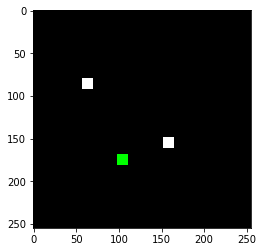

In [56]:
plt.imshow(stbd_broad_images_gt_50m[519].reshape(255, 255, 3))
plt.show();

In [57]:
def broad_greater_than_50_meters_port():
    """
    Return a numpy array of randomly generated images of a 
    power driven vessel that has two masthead lights and one running light
    visible for the port orientation.
    """
    white = (255, 255, 255)
    black = (0, 0, 0)
    red = (255, 0, 0)
    total_gens = np.random.randint(500, 701)
    all_broad_images = np.empty([total_gens, 195075], dtype=np.uint8)
    for i in range(total_gens):
        new_view = np.zeros((255, 255, 3))
        taller_masthead_light = np.random.randint(50, 126)
        shorter_masthead_light = np.random.randint(130, 186)
        left_endpoint = np.random.randint(20, 126)
        right_endpoint = np.random.randint(125, 211)
        running_light_diff = np.random.randint(10, 31)
        light_width = np.random.randint(10, 16)
        tall_masthead_height = taller_masthead_light + light_width
        tall_masthead_width = right_endpoint + light_width
        short_masthead_height = shorter_masthead_light + light_width
        short_masthead_width = left_endpoint + light_width
        running_light_start = shorter_masthead_light + running_light_diff
        running_light_width = running_light_start + light_width
        if right_endpoint - left_endpoint < 2 * light_width:
            running_light_loc = np.random.randint(right_endpoint - 20, right_endpoint + 21)
        else:
            running_light_loc = np.random.randint(left_endpoint, right_endpoint)
        running_light_area = running_light_loc + light_width
        new_view[taller_masthead_light:tall_masthead_height, right_endpoint:tall_masthead_width] = white
        new_view[shorter_masthead_light:short_masthead_height, left_endpoint:short_masthead_width] = white
        new_view[running_light_start:running_light_width, running_light_loc: running_light_area] = red
        new_view = new_view.flatten()
        all_broad_images[i] = new_view

    return all_broad_images

In [58]:
port_broad_images_gt_50m = broad_greater_than_50_meters_port()

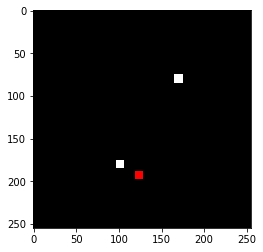

In [59]:
plt.imshow(port_broad_images_gt_50m[8].reshape(255, 255, 3))
plt.show();

In [60]:
def bow_lights_gt_50m():
    """
    Generate light configuration as if you were looking at a ship's bow.
    
    Ships greater than 50m in length.
    """
    white = (255, 255, 255)
    black = (0, 0, 0)
    red = (255, 0, 0)
    green = (0, 255, 0)
    total_gens = np.random.randint(500, 701)
    all_bow_images = np.empty([total_gens, 195075], dtype=np.uint8)
    for i in range(total_gens):
        new_view = np.zeros((255, 255, 3))
        light_width = np.random.randint(10, 16)
        center_horiz = np.random.randint(75, 176)
        taller_masthead_light = np.random.randint(25, 126)
        tall_mh_height = taller_masthead_light + light_width
        shorter_masthead_light = np.random.randint(tall_mh_height + 2, tall_mh_height + 16)
        short_mast_head_height = shorter_masthead_light + light_width
        center_for_runs = light_width // 2
        running_light_dist_horiz = np.random.randint(15, 56)
        running_light_dist_vert = np.random.randint(short_mast_head_height, short_mast_head_height + 51)
        new_view[taller_masthead_light:tall_mh_height, center_horiz: center_horiz + light_width] = white
        new_view[shorter_masthead_light:short_mast_head_height, center_horiz: center_horiz + light_width] = white
        left_running_light = center_horiz + center_for_runs - running_light_dist_horiz - light_width
        new_view[running_light_dist_vert: running_light_dist_vert + light_width, left_running_light: left_running_light + light_width] = green
        right_running_light = center_horiz + center_for_runs + running_light_dist_horiz
        new_view[running_light_dist_vert: running_light_dist_vert + light_width, right_running_light: right_running_light + light_width] = red
        new_view = new_view.flatten()
        all_bow_images[i] = new_view
    
    return all_bow_images

In [61]:
bow_images_gt_50m = bow_lights_gt_50m()

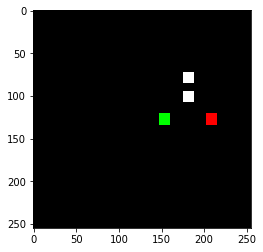

In [62]:
plt.imshow(bow_images_gt_50m[120].reshape(255, 255, 3))
plt.show();

In [63]:
def broad_less_than_50_meters_starboard():
    """
    Return a numpy array of randomly generated images of a 
    power driven vessel that has one masthead light and one running light
    visible starboard orientation.
    """
    white = (255, 255, 255)
    black = (0, 0, 0)
    green = (0, 255, 0)
    total_gens = np.random.randint(500, 701)
    all_broad_images = np.empty([total_gens, 195075], dtype=np.uint8)
    for i in range(total_gens):
        new_view = np.zeros((255, 255, 3))
        masthead_light = np.random.randint(50, 201)
        mh_horiz = np.random.randint(20, 211)
        running_light_diff = np.random.randint(10, 31)
        light_width = np.random.randint(10, 21)
        masthead_height = masthead_light + light_width
        masthead_width = mh_horiz + light_width
        running_light_start = masthead_height + running_light_diff
        running_light_width = running_light_start + light_width
        if mh_horiz < 2 * light_width:
            running_light_loc = np.random.randint(mh_horiz - 20, mh_horiz + 21)
        else:
            running_light_loc = np.random.randint(mh_horiz - 20, 211)
        running_light_area = running_light_loc + light_width
        new_view[masthead_light:masthead_height, mh_horiz:masthead_width] = white
        new_view[running_light_start:running_light_width, running_light_loc: running_light_area] = green
        new_view = new_view.flatten()
        all_broad_images[i] = new_view

    return all_broad_images

In [64]:
stbd_broad_lt_50m_images = broad_less_than_50_meters_starboard()

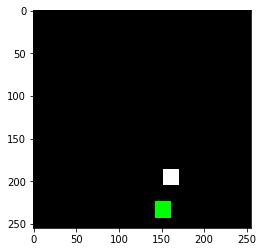

In [65]:
plt.imshow(stbd_broad_lt_50m_images[459].reshape(255, 255, 3))
plt.show();

In [66]:
def broad_less_than_50_meters_port():
    """
    Return a numpy array of randomly generated images of a 
    power driven vessel that has one masthead light and one running light
    visible.
    """
    white = (255, 255, 255)
    black = (0, 0, 0)
    red = (255, 0, 0)
    total_gens = np.random.randint(500, 701)
    all_broad_images = np.empty([total_gens, 195075], dtype=np.uint8)
    for i in range(total_gens):
        new_array = np.zeros((255, 255, 3))
        taller_masthead_light = np.random.randint(50, 201)
        distance_bw_left_endpoint = np.random.randint(20, 211)
        running_light_diff = np.random.randint(10, 31)
        light_width = np.random.randint(10, 21)
        tall_masthead_height = taller_masthead_light + light_width
        tall_masthead_width = distance_bw_left_endpoint + light_width
        running_light_start = tall_masthead_height + running_light_diff
        running_light_width = running_light_start + light_width
        if distance_bw_left_endpoint < 2 * light_width:
            running_light_loc = np.random.randint(distance_bw_left_endpoint - 20, distance_bw_left_endpoint + 21)
        else:
            running_light_loc = np.random.randint(25, distance_bw_left_endpoint + 20)
        running_light_area = running_light_loc + light_width
        new_array[taller_masthead_light:tall_masthead_height, distance_bw_left_endpoint:tall_masthead_width] = white
        new_array[running_light_start:running_light_width, running_light_loc: running_light_area] = red
        new_array = new_array.flatten()
        all_broad_images[i] = new_array

    return all_broad_images

In [67]:
port_broad_lt_50m_images = broad_less_than_50_meters_port()

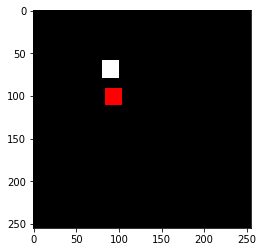

In [68]:
plt.imshow(port_broad_lt_50m_images[60].reshape(255, 255, 3))
plt.show();

In [69]:
def bow_lights_lt_50m():
    """
    Generate light configuration as if you were looking at a ship's bow.
    """
    white = (255, 255, 255)
    black = (0, 0, 0)
    red = (255, 0, 0)
    green = (0, 255, 0)
    total_gens = np.random.randint(500, 701)
    all_bow_images = np.empty([total_gens, 195075], dtype=np.uint8)
    for i in range(total_gens):
        new_array = np.zeros((255, 255, 3))
        light_width = np.random.randint(10, 16)
        center_horiz = np.random.randint(75, 176)
        taller_masthead_light = np.random.randint(25, 201)
        tall_mh_height = taller_masthead_light + light_width
        center_for_runs = light_width // 2
        running_light_dist_horiz = np.random.randint(56)
        running_light_dist_vert = np.random.randint(tall_mh_height, tall_mh_height + 51)
        new_array[taller_masthead_light:tall_mh_height, center_horiz: center_horiz + light_width] = white
        left_running_light = center_horiz + center_for_runs - running_light_dist_horiz - light_width
        new_array[running_light_dist_vert: running_light_dist_vert + light_width, left_running_light: left_running_light + light_width] = green
        right_running_light = center_horiz + center_for_runs + running_light_dist_horiz
        new_array[running_light_dist_vert: running_light_dist_vert + light_width, right_running_light: right_running_light + light_width] = red
        new_array = new_array.flatten()
        all_bow_images[i] = new_array
    
    return all_bow_images

In [70]:
bow_lights_lt_50_images = bow_lights_lt_50m()

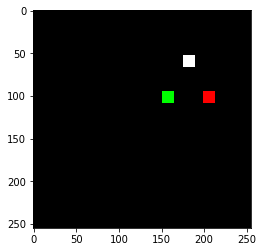

In [71]:
plt.imshow(bow_lights_lt_50_images[399].reshape(255, 255, 3))
plt.show();

## Aggregation

I'm going to put all the arrays together and ensure they receive the proper labels.

In [72]:
len(stern_images)
len(bow_lights_lt_50_images)
len(bow_images_gt_50m)
len(port_broad_images_gt_50m)
len(port_broad_lt_50m_images)
len(stbd_broad_images_gt_50m)
len(stbd_broad_lt_50m_images)

602

637

672

696

574

577

608

In [73]:
lights_data = np.concatenate((stern_images, stbd_broad_images_gt_50m, port_broad_images_gt_50m, bow_images_gt_50m,
                              stbd_broad_lt_50m_images, port_broad_lt_50m_images, bow_lights_lt_50_images))

In [74]:
targets

array(['Vessel underway (stern)',
       'Power-driven vessel underway (>50m in length) (starboard)',
       'Power-driven vessel underway (>50m in length) (port)',
       'Power-driven vessel underway (>50m in length) (bow)',
       'Power-driven vessel underway (<50m in length) (starboard)',
       'Power-driven vessel underway (<50m in length) (port)',
       'Power-driven vessel underway (<50m in length) (bow)'],
      dtype='<U57')

In [99]:
def make_target_label_array():
    """
    Makes an array of labels for the lights_data.
    """
    lights_data_lengths = [len(stern_images), len(bow_lights_lt_50_images), len(bow_images_gt_50m),
                           len(port_broad_images_gt_50m), len(port_broad_lt_50m_images), len(stbd_broad_images_gt_50m),
                           len(stbd_broad_lt_50m_images)]
    labels = np.array([], dtype=np.uint8)
    for i, length in enumerate(lights_data_lengths):
        new_labels = np.full(length, i)
        labels = np.append(labels, new_labels)
    
    return labels

In [100]:
lights_labels = make_target_label_array()

In [102]:
np.unique(lights_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([602, 637, 672, 696, 574, 577, 608], dtype=int64))

In [103]:
from sklearn.model_selection import StratifiedShuffleSplit

In [104]:
X, y = lights_data, lights_labels

In [105]:
split = StratifiedShuffleSplit(1, .8, 42)

In [106]:
for train_index, test_index in split.split(X, y):
    X_train, X_test = X[train_index], y[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [108]:
from sklearn.linear_model import SGDClassifier

In [110]:
y_train_stern = (y_train == 0)

In [111]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_stern)

C:\Users\kurtrm\Anaconda3\envs\ENV\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [121]:
sgd_clf.predict([black_array.flatten()])

array([ True], dtype=bool)